# Homework 4
## Ethan Gallup
## Unid: u1033198
***
***

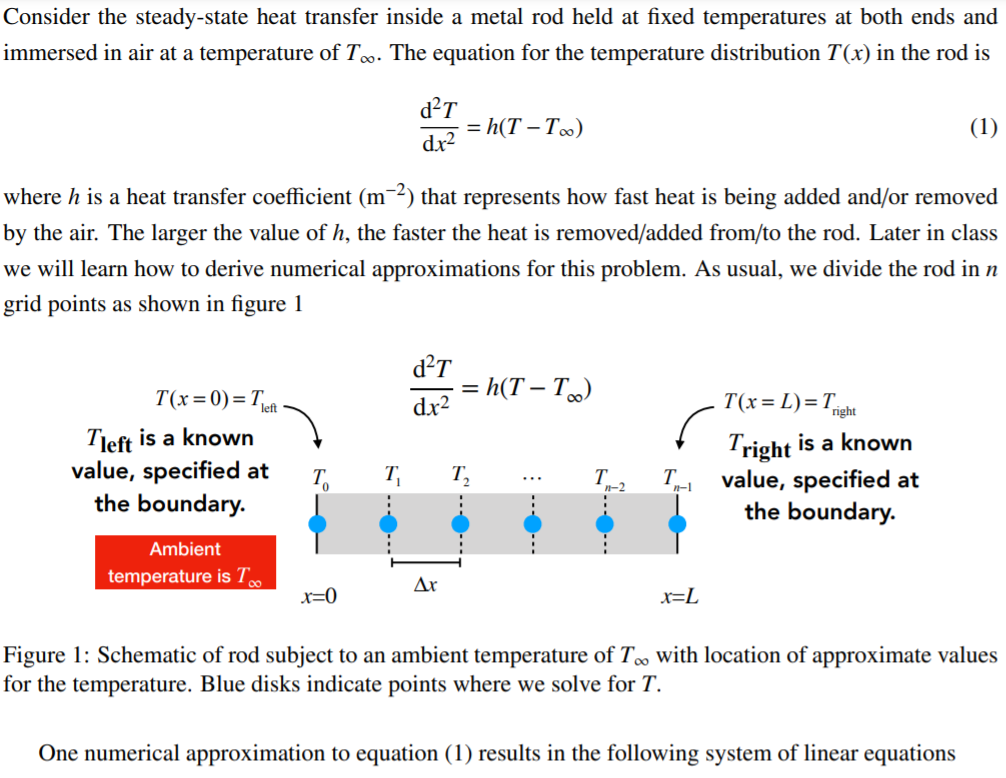

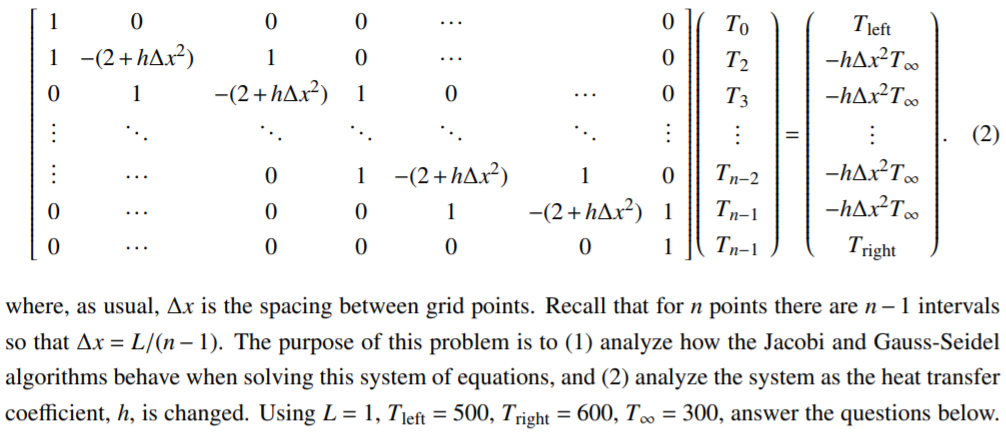

***
***

In [2]:
import numpy as np
import pandas as pd
from iterativesolvers import jacobi , gauss_siedel
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(precision=8)
pd.set_option('display.precision', 2)
L = 1
TL = 500
TR = 600
Tinf = 300


def make_system(n, h):
    global L, TL, TR, Tinf
    Δx = L/(n-1)
    
    main = -(2 + h * Δx**2) * np.ones(n)
    main[0], main[-1] = 1.0, 1.0
    upper, lower = np.ones(n-1), np.ones(n-1)
    upper[0] , lower[-1] = 0.0, 0.0
    A = np.diag(lower,-1) + np.diag(main,0) + np.diag(upper,1)
    
    b = -(h * Δx**2 * Tinf) * np.ones(n)
    b[0], b[-1] = TL, TR
    
    return A, b


## Problem 1
 Solve the system of equations in equation (2) using the Jacobi and the Gauss-Seidel methods for $h = [0.1,1,10,10^2,10^3,10^4]$. Use $n = 50$ , a tolerance of $\epsilon = 0.01$ based on the absolute
error of $||\mathbf{Ax}-\mathbf{b}||_2$ and an initial guess of $T_i = 500, i = 0...n−1$.

#### a) 
Plot the ratio of iteration count between Jacobi and Gauss-Seidel (jacobi/gs) required to\achieve this tolerance versus the heat transfer coefficient, h. What do you observe?

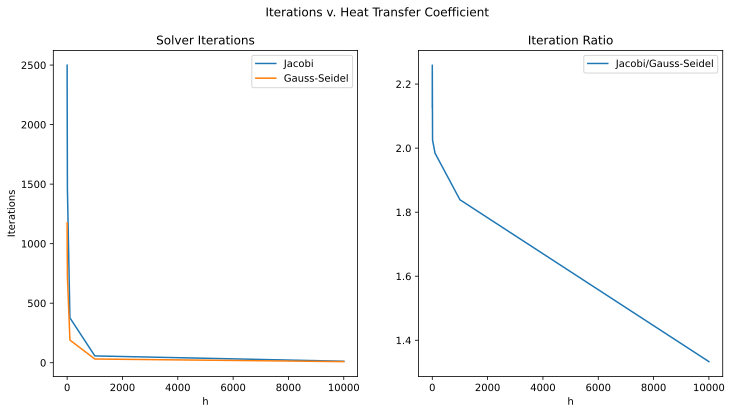

In [5]:
n = 50
tol = 0.01
T_i = np.ones(n) * 500

h = []
jaciter = []
gaussiter = []
riter = []
dfjac = pd.DataFrame()
dfgauss = pd.DataFrame()

for i in range(0, 6):
    h.append(10**(i-1))
    
    A, rhs = make_system(n, h[i])

    sol_jacobi, res, jniter = jacobi(A, T_i, rhs, tol, 10000000)
    sol_gs ,res ,gniter = gauss_siedel (A, T_i, rhs, tol, 10000000)
#     print(sol_jacobi)
    jaciter.append(jniter)
    gaussiter.append(gniter)
    riter.append(jniter/gniter)
    
    dfjac = pd.concat([dfjac, pd.DataFrame({f'h={10**(i-1)}': sol_jacobi})], axis=1)
    dfgauss = pd.concat([dfgauss, pd.DataFrame({f'h={10**(i-1)}': sol_gs})], axis=1)

dfjac.index = np.linspace(0, 1, n)    
dfgauss.index = np.linspace(0, 1, n) 

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
fig.suptitle('Iterations v. Heat Transfer Coefficient')
ax[0].plot(h, jaciter, label='Jacobi')
ax[0].plot(h, gaussiter, label='Gauss-Seidel')
ax[0].set_ylabel('Iterations')
ax[0].set_xlabel('h')
ax[0].set_title('Solver Iterations')
ax[0].legend()
ax[1].plot(h, riter, label='Jacobi/Gauss-Seidel')
ax[1].set_title('Iteration Ratio')
ax[1].set_xlabel('h')
ax[1].legend()
plt.show()

# plt.plot(h, jaciter, label='Jacobi')
# plt.plot(h, gaussiter, label='Gauss-Seidel')
# plt.legend()
# plt.show()
# plt.plot(h, riter)
# plt.show()

The Gauss-Seidel solver is almost always faster than Jacobi

#### b)
For both Jacobi and Gauss-Seidel, plot your numerical solution along the rod (Temperature
versus location on rod) for different values of h and discuss how the temperature profile
changes with h.

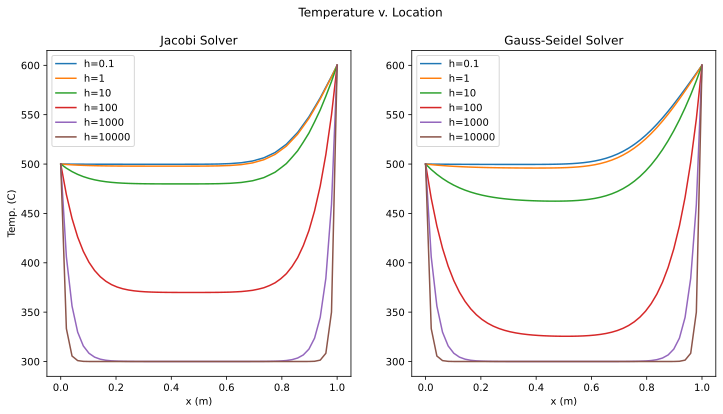

In [14]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
fig.suptitle('Temperature v. Location')
dfjac.plot(ax=ax[0])
ax[0].set_ylabel('Temp. (C)')
ax[0].set_xlabel('x (m)')
ax[0].set_title('Jacobi Solver')
dfgauss.plot(ax=ax[1])
ax[1].set_title('Gauss-Seidel Solver')
ax[1].set_xlabel('x (m)')
plt.show()

As h increases the heat is lost faster in the middle so the overall temperature of the bar is lower.

## Problem 2
Using a value of $h = 100$ and a tolerance of $\epsilon = 0.5$ based on the absolute error of $||\mathbf{Ax}-\mathbf{b}||_2$, solve the system of equations for $n = [10,20,30,40,50,60,...,200]$ using the Jacobi and the GaussSeidel methods. Now compare the number of iterations it took each method to achieve the required
tolerance. What do you observe? HINT: Plot the ratio of the number of iterations (jacobi/gs)
versus the number of grid points n.

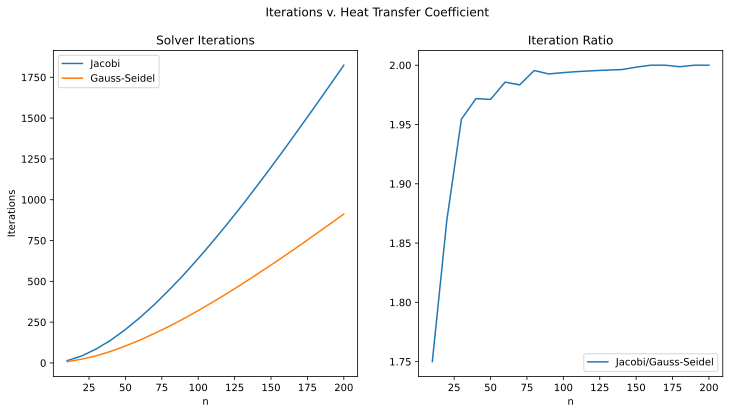

In [6]:
h = 100
tol = .5
ns = np.arange(10, 201, 10)

jaciter = []
gaussiter = []
riter = []

for n in ns:
    T_i = np.ones(n) * 500
    A, rhs = make_system(n, h)
    sol_jacobi, res, jniter = jacobi(A, T_i, rhs, tol, 10000000)
    sol_gs ,res ,gniter = gauss_siedel (A, T_i, rhs, tol, 10000000)


    jaciter.append(jniter)
    
    gaussiter.append(gniter)
    riter.append(jniter/gniter)
    
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
fig.suptitle('Iterations v. Heat Transfer Coefficient')
ax[0].plot(ns, jaciter, label='Jacobi')
ax[0].plot(ns, gaussiter, label='Gauss-Seidel')
ax[0].set_ylabel('Iterations')
ax[0].set_xlabel('n')
ax[0].set_title('Solver Iterations')
ax[0].legend()
ax[1].plot(ns, riter, label='Jacobi/Gauss-Seidel')
ax[1].set_title('Iteration Ratio')
ax[1].set_xlabel('n')
ax[1].legend()
plt.show()

Gauss-Seidel seems to always do significantly better than Jacobi.